In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [0]:
clustered_10 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/clustered_10.csv')

In [4]:
clustered_10

,grouped_station,seasons,dayOfWeek,hour,total_trips
0,0.0,0,0,0,1
1,0.0,0,0,1,1
2,0.0,0,0,2,1
3,0.0,0,0,3,1
4,0.0,0,0,4,1
...,...,...,...,...,...
6485,9.0,3,6,19,2
6486,9.0,3,6,20,2
6487,9.0,3,6,21,1
6488,9.0,3,6,22,1


In [5]:
clustered_10.total_trips.max()

7

In [0]:
X_10 = clustered_10.iloc[:, 0:4].values
y_10 = clustered_10.iloc[:, 4].values

In [0]:
X_10_train, X_10_test, y_10_train, y_10_test = train_test_split(X_10, y_10, test_size=0.20, random_state=42)

In [10]:
regressor_10 = RandomForestRegressor(n_estimators = 50, random_state = 0, max_leaf_nodes=3,min_samples_split=15)
regressor_10.fit(X_10_train,y_10_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=3,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [13]:
predictions_10 = regressor_10.predict(X_10_test)
predictions_10

array([1.12171841, 1.01539244, 1.12171841, ..., 1.7618984 , 1.7618984 ,
       1.12171841])

In [15]:
predictions_10.max()

1.76189839846859

In [17]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_10_test, predictions_10)

0.04039048215174875

(0.0, 4.0)

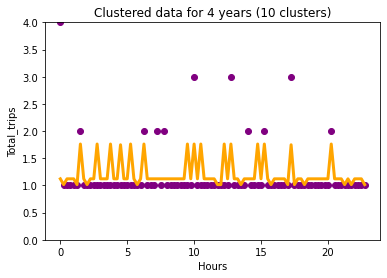

In [35]:
X_grid_10 = np.arange(X_10_test[:,3].min(), X_10_test[:,3].max(), 0.25)
X_grid_10 = X_grid_10.reshape((len(X_grid_10), 1)) 
plt.scatter(X_grid_10, y_10_test[:92], color='purple')
plt.plot(X_grid_10, predictions_10[:92], color='orange', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Total_trips')
plt.title('Clustered data for 4 years (10 clusters)')
plt.ylim(0,4)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_10_test, predictions_10)

0.24887586429235464

In [0]:
# 20 clusters
clustered_20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/clustered_20.csv')
X_20 = clustered_20.iloc[:, 0:4].values
y_20 = clustered_20.iloc[:, 4].values

In [0]:
X_20_train, X_20_test, y_20_train, y_20_test = train_test_split(X_20, y_20, test_size=0.20, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor_20 = RandomForestRegressor(n_estimators = 50, random_state = 0, max_leaf_nodes=3,min_samples_split=15)
regressor_20.fit(X_20_train,y_20_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=3,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
predictions_20 = regressor_20.predict(X_20_test)
predictions_20

array([1.21843957, 1.21843957, 1.21843957, ..., 1.21843957, 1.21843957,
       1.04400657])

In [29]:
predictions_20.max()

2.085864691899192

In [30]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_20_test, predictions_20)

0.05729548350490798

In [31]:
from sklearn.metrics import r2_score
r2_score(y_20_test, predictions_20)

0.15349908823159641

(0.0, 5.0)

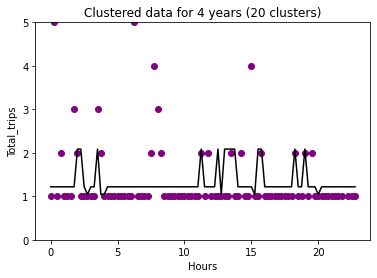

In [36]:
X_grid_20 = np.arange(X_20_test[:,3].min(), X_20_test[:,3].max(), 0.25)
X_grid_20 = X_grid_20.reshape((len(X_grid_20), 1)) 
plt.scatter(X_grid_20, y_20_test[:92], color='purple',)
plt.plot(X_grid_20, predictions_20[:92], color='black')
plt.xlabel('Hours')
plt.ylabel('Total_trips')
plt.title('Clustered data for 4 years (20 clusters)')
plt.ylim(0,5)